In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import time
%matplotlib inline

In [2]:
def printResults(coef, k, time):
    stepsString = "steps" if k >1 else "step"
    print("---------------------------------------------------------")
    print("Rosenblatt Perceptron")
    print("{} {} taken".format(k, stepsString))
    print("Coeficients given by neural network: {} \n".format(coef))
    print("Algorithm finished in {} seconds".format(time))


In [3]:
def drawLine(X , y, coef):
    minX = np.min(X[:, 0])
    maxX = np.max(X[:, 0])
    minY = np.min(X[:, 1])-1
    maxY = np.max(X[:, 1])+1
    xpoly = np.linspace(minX,maxX,10)
    ypoly = coef[2] *xpoly + coef[1]
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired )
    plt.plot(xpoly,ypoly)
    plt.title("Separation line")
    plt.xlabel("X[:, 0]")
    plt.ylabel("X[:, 1]")
    plt.ylim(minY,maxY)
    

In [8]:
class Perceptron():
    
    def __init__(self,ETA=0,stepLimiter=100):
        self.ETA = ETA
        self.__stepLimiter = stepLimiter
        
    def __setVector(self):
        self.__vector = np.zeros(self.n_features)
        
    def __setError(self): # wypełnienie wektora błędnie sklasyfikowanych punktów
        self.__setValues()
        self.__error =[]
        self.__error = np.array([index for index, value in enumerate( self.__yPredicted) if   self.y[index] != value])
        #print("calc error", self.__error)
        return self.__error
        
    def __calculateNewVector(self,indexSample):
        self.__vector = self.__vector + self.ETA * np.multiply(self.y[indexSample],self.X[indexSample])
        
    def __setLabel(self):#funkcja ustalająca etykiety y
        self.__yPredicted = np.zeros(self.size)
        self.__yPredicted[self.__s > 0] =1
        #print("calc pred", self.__yPredicted)
        
    def __setValues(self): # wyliczona wartość którą będziemy podawać do funkcji decyzyjnej
        self.__s = np.array([np.sum( self.__vector*x_row , axis =0) for x_row in  self.X ]  ) 
        #print("s:" ,self.__s)
        self.__setLabel()
        
    def __getRandomErrorLabel(self):
        return np.random.choice(self.__error)
            
    def __addOnes(self,X):
        return np.hstack(( np.ones((X.shape[0],1),dtype=X.dtype),X))
            
    def fit(self,X,y):
        self.y =y
        self.X  = self.__addOnes(X)
        self.size = np.shape(self.X)[0]
        self.n_features = np.shape(self.X)[1]
        
    def predict(self):
        self.__setVector() # ustawiamy wektor wag (początkowo zerowe wartości)
        self.k =0  #liczba wykonanych kroków aktualizacyjnych
        while len(self.__setError()) != 0 and self.k < self.__stepLimiter: # dopóki ziór błędnie sklasyfikowanych przykładów posiada indeksy
            indexSample = self.__getRandomErrorLabel() # wylosuj ze zbioru error przykład uczący [index]
            self.__calculateNewVector(indexSample) # popraw wagi 
            self.k +=1
        return self.__vector,self.k # zwróć otrzymany wektor wag i liczbę wykonanych kroków
        
        
    

y labels: [0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0]


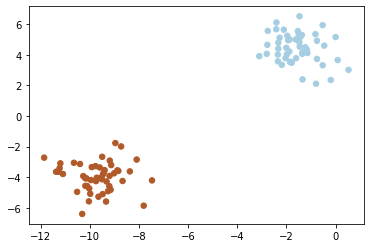

In [9]:
nFeatures =2
nSamples =100
X, y = make_blobs(n_samples=nSamples, centers=2,n_features =nFeatures, random_state=1)
print("y labels: {}".format(y))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

---------------------------------------------------------
Rosenblatt Perceptron
100 steps taken
Coeficients given by neural network: [ 1.         -9.31764266 -4.27315015] 

Algorithm finished in 0.13628820000000985 seconds
hello


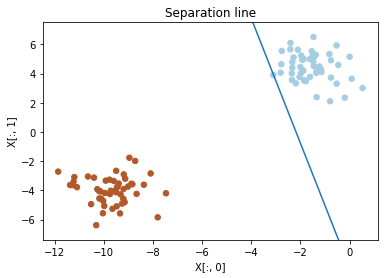

In [10]:
ETA =1 #współczynnik uczenia
stepLimiter = 100
tic = time.perf_counter()
rosenblat = Perceptron(ETA, stepLimiter)
rosenblat.fit(X,y)
coef , k =rosenblat.predict() 
toc = time.perf_counter()
printResults(coef,k, toc -tic)
drawLine(X,y,coef)